In [1]:
#data preparation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import joblib
import time

In [2]:
df = pd.read_csv("Transformed Data Set - Sheet1.csv")
df

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F
...,...,...,...,...,...
61,Cool,Rock,Vodka,Coca Cola/Pepsi,M
62,Cool,Hip hop,Beer,Coca Cola/Pepsi,M
63,Neutral,Hip hop,Doesn't drink,Fanta,M
64,Cool,Rock,Wine,Coca Cola/Pepsi,M


In [3]:
df.describe()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
count,66,66,66,66,66
unique,3,7,6,4,2
top,Cool,Rock,Doesn't drink,Coca Cola/Pepsi,F
freq,37,19,14,32,33


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Favorite Color        66 non-null     object
 1   Favorite Music Genre  66 non-null     object
 2   Favorite Beverage     66 non-null     object
 3   Favorite Soft Drink   66 non-null     object
 4   Gender                66 non-null     object
dtypes: object(5)
memory usage: 2.7+ KB


In [5]:
df.isnull().sum()

Favorite Color          0
Favorite Music Genre    0
Favorite Beverage       0
Favorite Soft Drink     0
Gender                  0
dtype: int64

In [6]:
x = df.drop(['Gender'], axis=1)
y = df['Gender']

print("junlah fitur:", x.shape)
print("jumlah target:", y.shape)


junlah fitur: (66, 4)
jumlah target: (66,)


In [7]:
# membagi data set menjadi data latih dan data uji
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)
x_test

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink
45,Cool,Hip hop,Beer,Coca Cola/Pepsi
28,Cool,Pop,Doesn't drink,Coca Cola/Pepsi
29,Cool,Electronic,Doesn't drink,Fanta
55,Cool,Electronic,Other,Fanta
63,Neutral,Hip hop,Doesn't drink,Fanta
31,Neutral,Rock,Beer,Coca Cola/Pepsi
51,Cool,Rock,Doesn't drink,Coca Cola/Pepsi
46,Cool,Hip hop,Wine,Coca Cola/Pepsi
34,Neutral,Hip hop,Beer,7UP/Sprite
4,Cool,Rock,Vodka,Coca Cola/Pepsi


In [8]:
x_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)
x_train

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink
65,Cool,Electronic,Beer,Coca Cola/Pepsi
2,Warm,Rock,Wine,Coca Cola/Pepsi
11,Warm,Pop,Other,7UP/Sprite
30,Warm,Rock,Other,Coca Cola/Pepsi
10,Cool,Pop,Other,7UP/Sprite
22,Cool,Rock,Vodka,Coca Cola/Pepsi
41,Neutral,Pop,Doesn't drink,7UP/Sprite
64,Cool,Rock,Wine,Coca Cola/Pepsi
32,Cool,R&B and soul,Beer,Coca Cola/Pepsi
7,Warm,Pop,Whiskey,Fanta


In [9]:
from sklearn.preprocessing import LabelEncoder

label_encoders={}
for column in x_train.columns:
    le = LabelEncoder()
    x_train[column]=le.fit_transform(x_train[column])
    x_test[column]=le.transform(x_test[column])
    label_encoders[column]=le

In [10]:
# membuat dan melatih model Regresi Logistik
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [11]:
y_pred = pd.Series(model.predict(x_test))
y_test = y_test.reset_index(drop=True)
z = pd.concat([y_test, y_pred], axis=1)
z.columns = ["true","predict"]
z.head()


,true,predict
0,M,M
1,F,M
2,F,M
3,M,M
4,M,M


In [12]:
print("Accuracy",metrics.accuracy_score(y_test, y_pred))
print("Precision",metrics.precision_score(y_test, y_pred,pos_label="M"))
print("Recall",metrics.recall_score(y_test, y_pred,pos_label="M"))

Accuracy 0.5714285714285714
Precision 0.75
Recall 0.6


Text(0.5, 23.52222222222222, 'True')

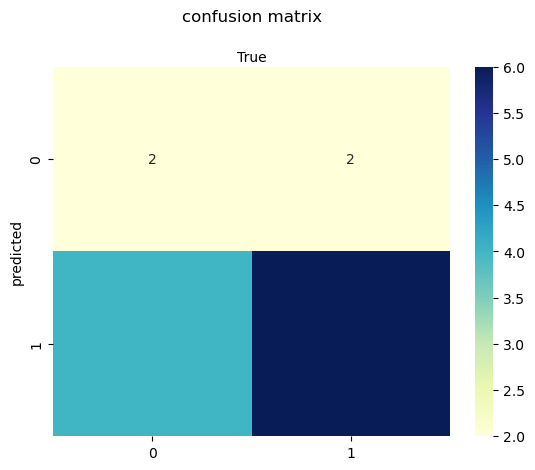

In [13]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

labels = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

# creat heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot= True, cmap="YlGnBu",fmt='g')
ax.xaxis.set_label_position("top")
plt.title('confusion matrix', y=1.1)
plt.ylabel('predicted')
plt.xlabel('True')

In [14]:
# model = LogisticRegression()
joblib.dump(model,'Logistic_saved')

['Logistic_saved']

In [15]:
Logisticjl= joblib.load('Logistic_saved')